# Matplotlib Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df = df.dropna(subset=['type','release_year','rating','country','duration'])

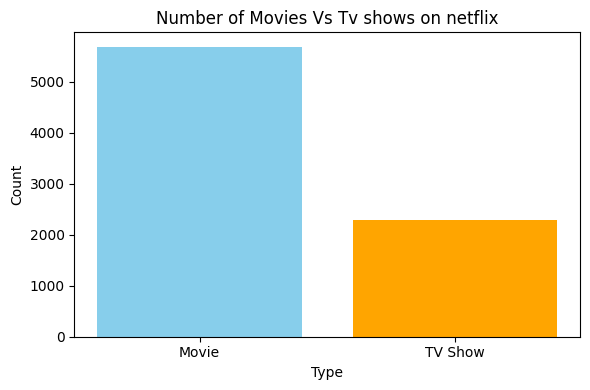

In [6]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue','orange'])
plt.title('Number of Movies Vs Tv shows on netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

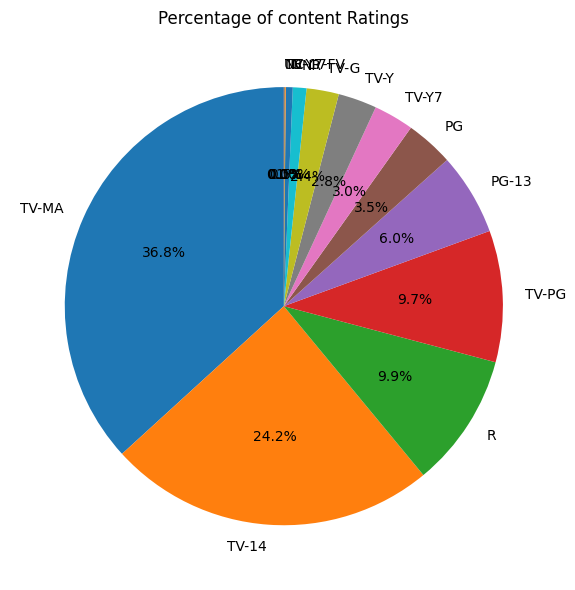

In [8]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%',startangle=90)
plt.title('Percentage of content Ratings')
plt.tight_layout()
plt.savefig('content_rating.png')
plt.show()

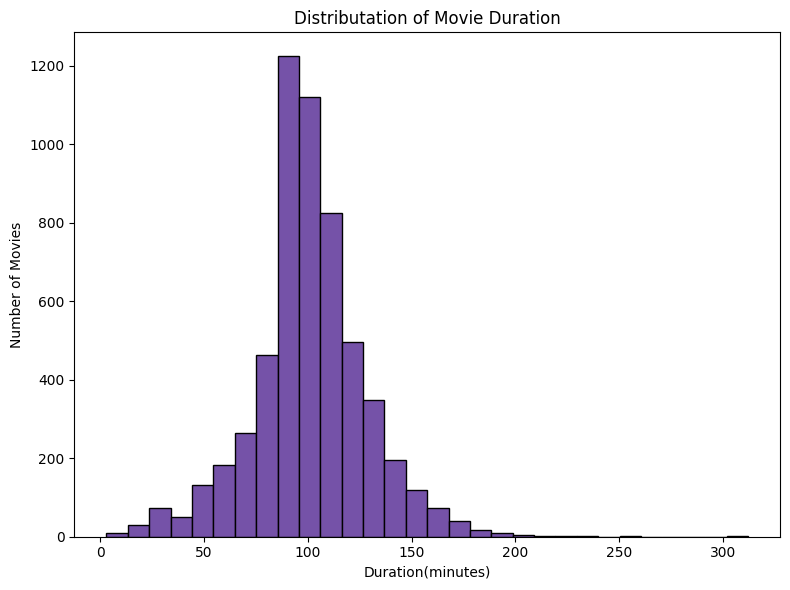

In [11]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min',''). astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30, color='#7552a8', edgecolor='black')
plt.title('Distributation of Movie Duration')
plt.xlabel('Duration(minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histrogram.png')
plt.show()

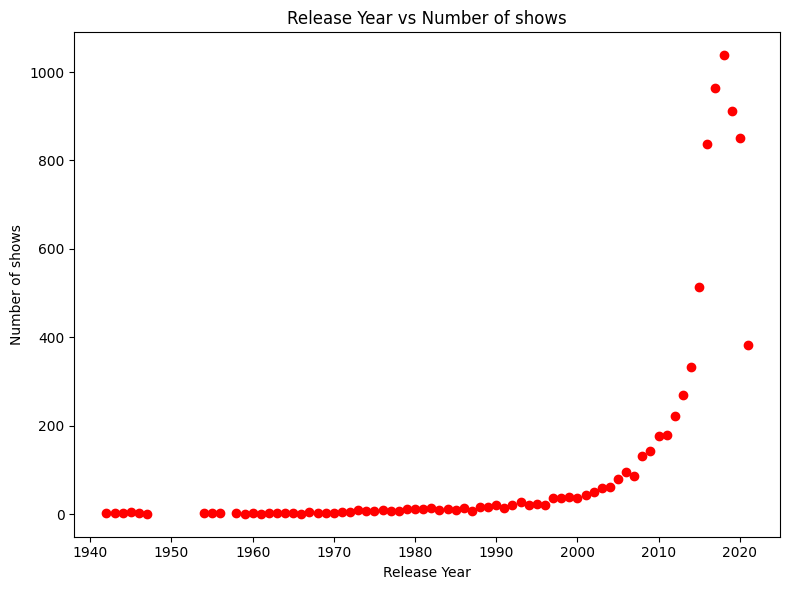

In [15]:
release_count = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(release_count.index, release_count.values, color='red')
plt.title('Release Year vs Number of shows')
plt.xlabel('Release Year')
plt.ylabel('Number of shows')
plt.tight_layout()
plt.savefig('release_year.png')
plt.show()

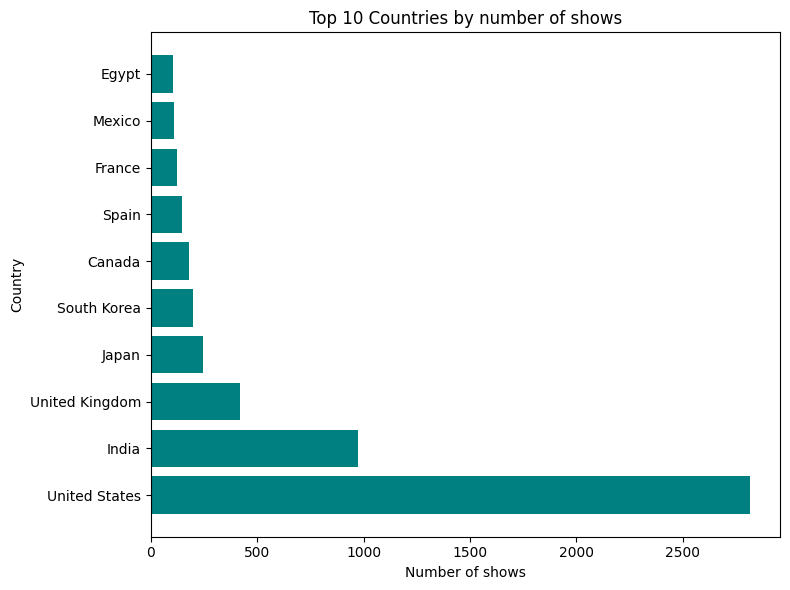

In [19]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by number of shows')
plt.xlabel('Number of shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('countries.png')
plt.show()

In [21]:
content_by_year= df.groupby(['release_year', 'type']).size().unstack().fillna(0)


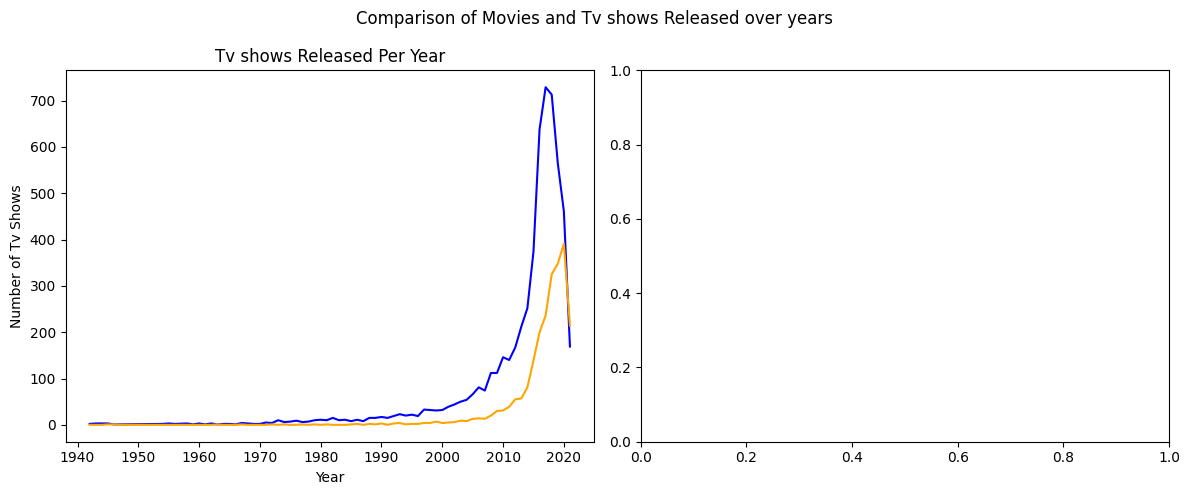

In [26]:
fig, ax= plt.subplots(1,2,figsize=(12,5))

#first subplot:movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='Blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot:Tv shows
ax[0].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[0].set_title('Tv shows Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Tv Shows')

fig.suptitle('Comparison of Movies and Tv shows Released over years')
plt.tight_layout()
plt.savefig('Movie_tv_shows_comparison.png')
plt.show()